In [5]:
import spacy
nlp = spacy.load("fr_core_news_sm")
doc = nlp("""Ville de Fribourg
Le Conseil communal
Der Gemeinderat
---
RECOMMANDE
Madame Catherine Liechti et
Monsieur Bernard Ayer
Route François d'Arsent 11
1700 Fribourg
Fribourg, le 4 juin 2024
N/réf. : 174/2018
DECISION SUR OPPOSITION
LE CONSEIL COMMUNAL DE LA VILLE DE FRIBOURG
Vu :
La loi fédérale du 22 juin 1979 sur l'aménagement du territoire (LAT ; RS 700) ;
La loi du 2 décembre 2008 sur l'aménagement du territoire et les constructions (LATeC ; RSF 710.1) ;
Le Règlement du 1er décembre 2009 d'exécution de la loi sur l'aménagement du territoire et les constructions (ReLATeC ; RSF 710.11) ;
L'Accord intercantonal du 22 septembre 2005 harmonisant la terminologie dans le domaine des constructions (AIHC) ;
Le code de procédure et de juridiction administrative fribourgeois (CPJA ; RSF 150.1) ;
La première mise à l'enquête publique de la révision du Plan d'aménagement local (PAL) du 17 novembre 2018 ;
La deuxième mise à l'enquête publique de la révision du PAL du 22 juin 2019 ;
La troisième mise à l'enquête publique de la révision du PAL du 19 septembre 2020 ;
La quatrième mise à l'enquête publique de la révision du PAL du 4 juin 2022 ;
La cinquième mise à l'enquête publique de la révision du PAL du 29 avril 2023 ;
L'opposition formée le 17 décembre 2018 par Madame Catherine Liechti et Monsieur Bernard Ayer. """)
names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
print(names)

[]


In [14]:
t = """
Ville de Fribourg
Le Conseil communal
Der Gemeinderat
---
RECOMMANDE
Madame Catherine Liechti et
Monsieur Bernard Ayer
Route François d'Arsent 11
1700 Fribourg
Fribourg, le 4 juin 2024
N/réf. : 174/2018
DECISION SUR OPPOSITION
LE CONSEIL COMMUNAL DE LA VILLE DE FRIBOURG
Vu :
La loi fédérale du 22 juin 1979 sur l'aménagement du territoire (LAT ; RS 700) ;
La loi du 2 décembre 2008 sur l'aménagement du territoire et les constructions (LATeC ; RSF 710.1) ;
Le Règlement du 1er décembre 2009 d'exécution de la loi sur l'aménagement du territoire et les constructions (ReLATeC ; RSF 710.11) ;
L'Accord intercantonal du 22 septembre 2005 harmonisant la terminologie dans le domaine des constructions (AIHC) ;
Le code de procédure et de juridiction administrative fribourgeois (CPJA ; RSF 150.1) ;
La première mise à l'enquête publique de la révision du Plan d'aménagement local (PAL) du 17 novembre 2018 ;
La deuxième mise à l'enquête publique de la révision du PAL du 22 juin 2019 ;
La troisième mise à l'enquête publique de la révision du PAL du 19 septembre 2020 ;
La quatrième mise à l'enquête publique de la révision du PAL du 4 juin 2022 ;
La cinquième mise à l'enquête publique de la révision du PAL du 29 avril 2023 ;
L'opposition formée le 17 décembre 2018 par Madame Catherine Liechti et Monsieur Bernard Ayer. 

"""

from names_dataset import NameDataset
nd = NameDataset()
# Split the text into words
words = t.split()

# Find names that are in the dataset
names_in_dataset = [word for word in words if nd.search(word) is not None]
# Filter names that are likely to be person names or surnames
filtered_names = []
for name in names_in_dataset:
    search_result = nd.search(name)
    if search_result:
        print(f"name : {name} search_result: {search_result}")
        # Check if it's a given name or surname
        if search_result['first_name'] is not None or search_result['last_name'] is not None:
            filtered_names.append(name)

# Update names_in_dataset with the filtered list
names_in_dataset = filtered_names

# Print the result
print("Names found in the dataset:")
print(names_in_dataset)


name : Ville search_result: {'first_name': {'country': {'Switzerland': 0.001, 'Germany': 0.001, 'Algeria': 0.003, 'Finland': 0.961, 'France': 0.007, 'United Kingdom': 0.002, 'Italy': 0.002, 'Morocco': 0.003, 'Sweden': 0.015, 'United States': 0.004}, 'gender': {'Female': 0.009, 'Male': 0.991}, 'rank': {'Switzerland': 4063, 'Germany': 10951, 'Finland': 5, 'France': 10769, 'Sweden': 377, 'Algeria': None, 'United Kingdom': None, 'Italy': None, 'Morocco': None, 'United States': None}}, 'last_name': {'country': {'Colombia': 0.033, 'Algeria': 0.095, 'France': 0.454, 'United Kingdom': 0.028, 'Italy': 0.064, 'Morocco': 0.061, 'Mexico': 0.067, 'Nigeria': 0.042, 'Saudi Arabia': 0.03, 'United States': 0.126}, 'gender': {}, 'rank': {'Colombia': 14096, 'Algeria': 7801, 'France': 2369, 'Morocco': 15503, 'Mexico': 5792, 'Nigeria': 9524, 'United States': 12059, 'United Kingdom': None, 'Italy': None, 'Saudi Arabia': None}}}
name : de search_result: {'first_name': {'country': {'Belgium': 0.091, 'Germany'

Fetching 30 files: 100%|██████████| 30/30 [00:00<00:00, 12056.06it/s]


Matrix shape: (1024, 606)
Matrix saved as ch_names.npy


In [44]:

# Load the saved matrix
ch_names_matrix = np.load('ch_names.npy')

print(f"Loaded matrix shape: {ch_names_matrix.shape}")


Loaded matrix shape: (1024, 606)


In [82]:
v = get_embedding("maison")
print(v.shape)
r = v @ ch_names_matrix
print(r.shape)
score = max(r)
print(score)
if score < 0.65:
    print("Not a name")
else:
    print("Is a name")

(1024,)
(606,)
0.5860212
Not a name


In [35]:
testing_names = [
    "Urs", "Beat", "Reto",  
     "Jürg",  "Roland",
    "Heidi", "Ruth", "Vreni", "Barbara", "Esther",
     "Regula",  "Beatrice", "Sandra",  
       "Bob", "Alicia", "Luigi", "Jimmy", "Clémentine", "Rose", "Edgar", "Liechti", "Ayer", "Morena", "Minder", "Ghul", "De Kerdrel"
]

testing_names_embeddings = [get_embedding(n) for n in testing_names]

similarities = []
for t in testing_names_embeddings:
    
    s = []
    for n in name_embeddings:
        s.append(t.dot(n))
    similarities.append(max(s))

In [36]:
baselines_french_words = [
    "maison", "voiture", "arbre", "table", "chaise", "livre", "stylo", "fenêtre",
    "porte", "ordinateur", "téléphone", "cuisine", "jardin", "école", "travail",
    "restaurant", "café", "musique", "film", "théâtre", "peinture", "sculpture",
    "photographie", "danse", "sport", "football", "tennis", "natation", "vélo",
    "montagne", "plage", "rivière", "forêt", "ville", "campagne", "boulangerie",
    "pharmacie", "hôpital", "bibliothèque", "musée", "parc", "zoo", "cinéma",
    "concert", "exposition", "marché", "magasin", "bureau", "usine", "ferme",
    "soleil", "lune", "étoile", "planète", "galaxie", "univers", "atome", "molécule",
    "cellule", "organisme", "écosystème", "climat", "atmosphère", "océan", "continent",
    "pays", "région", "département", "commune", "quartier", "rue", "avenue", "boulevard",
    "place", "pont", "tunnel", "aéroport", "gare", "port", "métro", "bus", "train",
    "avion", "bateau", "voilier", "sous-marin", "fusée", "satellite", "robot", "drone",
    "ordinateur", "smartphone", "tablette", "montre", "télévision", "radio", "appareil photo",
    "caméra", "microscope", "télescope", "boussole", "carte", "GPS", "internet", "réseau social",
    "blog", "podcast", "vidéo", "jeu vidéo", "réalité virtuelle", "intelligence artificielle",
    "big data", "cloud computing", "blockchain", "cryptomonnaie", "énergie", "électricité",
    "pétrole", "gaz", "charbon", "énergie solaire", "énergie éolienne", "énergie hydraulique",
    "énergie nucléaire", "batterie", "pile", "ampoule", "chauffage", "climatisation",
    "réfrigérateur", "four", "micro-ondes", "lave-linge", "lave-vaisselle", "aspirateur",
    "fer à repasser", "sèche-cheveux", "rasoir", "brosse à dents", "savon", "shampoing",
    "parfum", "maquillage", "vêtement", "chaussure", "sac", "montre", "bijou", "lunettes",
    "parapluie", "valise", "sac à dos", "portefeuille", "clé", "serrure", "alarme"
]
baselines_german_words = [
    "Haus", "Auto", "Baum", "Tisch", "Stuhl", "Buch", "Stift", "Fenster",
    "Tür", "Computer", "Telefon", "Küche", "Garten", "Schule", "Arbeit",
    "Restaurant", "Café", "Musik", "Film", "Theater", "Malerei", "Skulptur",
    "Fotografie", "Tanz", "Sport", "Fußball", "Tennis", "Schwimmen", "Fahrrad",
    "Berg", "Strand", "Fluss", "Wald", "Stadt", "Land", "Bäckerei",
    "Apotheke", "Krankenhaus", "Bibliothek", "Museum", "Park", "Zoo", "Kino",
    "Konzert", "Ausstellung", "Markt", "Geschäft", "Büro", "Fabrik", "Bauernhof",
    "Sonne", "Mond", "Stern", "Planet", "Galaxie", "Universum", "Atom", "Molekül",
    "Zelle", "Organismus", "Ökosystem", "Klima", "Atmosphäre", "Ozean", "Kontinent",
    "Land", "Region", "Bundesland", "Gemeinde", "Viertel", "Straße", "Allee", "Boulevard",
    "Platz", "Brücke", "Tunnel", "Flughafen", "Bahnhof", "Hafen", "U-Bahn", "Bus", "Zug",
    "Flugzeug", "Schiff", "Segelboot", "U-Boot", "Rakete", "Satellit", "Roboter", "Drohne",
    "Computer", "Smartphone", "Tablet", "Uhr", "Fernseher", "Radio", "Kamera",
    "Videokamera", "Mikroskop", "Teleskop", "Kompass", "Karte", "GPS", "Internet", "Soziales Netzwerk",
    "Blog", "Podcast", "Video", "Videospiel", "Virtuelle Realität", "Künstliche Intelligenz",
    "Big Data", "Cloud Computing", "Blockchain", "Kryptowährung", "Energie", "Elektrizität",
    "Öl", "Gas", "Kohle", "Solarenergie", "Windenergie", "Wasserkraft",
    "Kernenergie", "Batterie", "Akku", "Glühbirne", "Heizung", "Klimaanlage",
    "Kühlschrank", "Ofen", "Mikrowelle", "Waschmaschine", "Geschirrspüler", "Staubsauger",
    "Bügeleisen", "Haartrockner", "Rasierer", "Zahnbürste", "Seife", "Shampoo",
    "Parfüm", "Make-up", "Kleidung", "Schuh", "Tasche", "Armbanduhr", "Schmuck", "Brille",
    "Regenschirm", "Koffer", "Rucksack", "Geldbörse", "Schlüssel", "Schloss", "Alarm"
]
"""
baselines_italian_words = [
    "casa", "automobile", "albero", "tavolo", "sedia", "libro", "penna", "finestra",
    "porta", "computer", "telefono", "cucina", "giardino", "scuola", "lavoro",
    "ristorante", "caffè", "musica", "film", "teatro", "pittura", "scultura",
    "fotografia", "danza", "sport", "calcio", "tennis", "nuoto", "bicicletta",
    "montagna", "spiaggia", "fiume", "foresta", "città", "campagna", "panetteria",
    "farmacia", "ospedale", "biblioteca", "museo", "parco", "zoo", "cinema",
    "concerto", "mostra", "mercato", "negozio", "ufficio", "fabbrica", "fattoria"
]

baselines_english_words = [
    "house", "car", "tree", "table", "chair", "book", "pen", "window",
    "door", "computer", "phone", "kitchen", "garden", "school", "work",
    "restaurant", "cafe", "music", "movie", "theater", "painting", "sculpture",
    "photography", "dance", "sport", "football", "tennis", "swimming", "bicycle",
    "mountain", "beach", "river", "forest", "city", "countryside", "bakery",
    "pharmacy", "hospital", "library", "museum", "park", "zoo", "cinema",
    "concert", "exhibition", "market", "shop", "office", "factory", "farm"
]
"""
baselines_embeddings = []
for word_list in [baselines_french_words, baselines_german_words]:
    baselines_embeddings.extend([get_embedding(word) for word in word_list])




In [ ]:
baseline_similarities = []
for t in testing_names_embeddings:
    s = []
    for b in baselines_embeddings:
        s.append(t.dot(b))
    baseline_similarities.append(max(s))

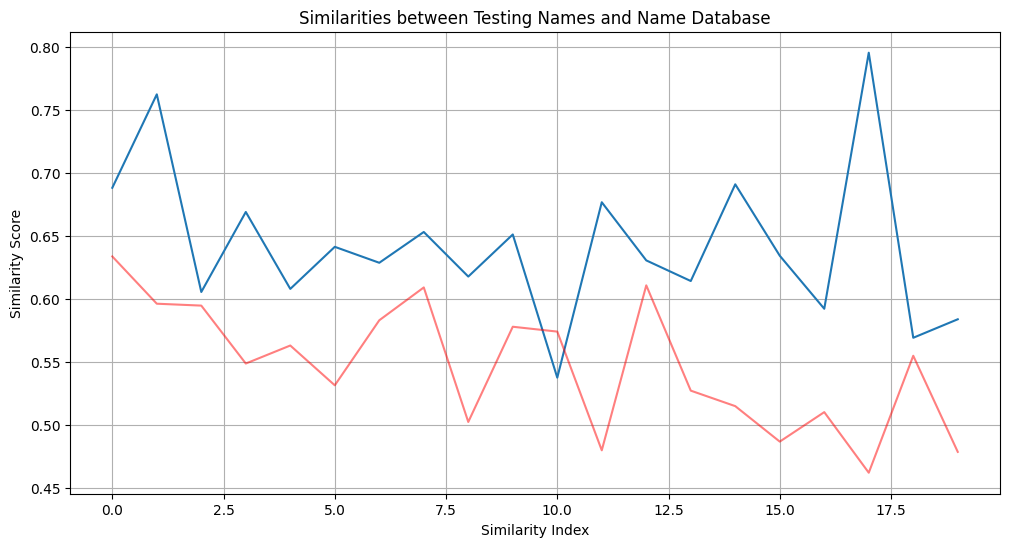

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(similarities)
plt.plot(baseline_similarities, label='Baseline', alpha=0.5, color='red')
plt.title('Similarities between Testing Names and Name Database')
plt.xlabel('Similarity Index')
plt.ylabel('Similarity Score')
plt.grid(True)
plt.show()


In [37]:
german_addresses = [
    "Bahnhofstrasse 1, 8001 Zürich",
    "Hauptstrasse 1, 8002 Zürich",
    "Münsterplatz 1, 8001 Zürich",
    "Seestrasse 10, 8002 Zürich",
    "Limmatquai 55, 8001 Zürich",
    "Bellerivestrasse 21, 8008 Zürich",
    "Rämistrasse 101, 8092 Zürich",
    "Langstrasse 200, 8005 Zürich",
    "Hardturmstrasse 269, 8005 Zürich",
    "Birmensdorferstrasse 55, 8004 Zürich",
    "Schaffhauserstrasse 359, 8050 Zürich",
    "Forchstrasse 145, 8032 Zürich",
    "Badenerstrasse 500, 8048 Zürich",
    "Hohlstrasse 489, 8048 Zürich",
    "Weinbergstrasse 35, 8006 Zürich",
    "Universitätstrasse 84, 8006 Zürich",
    "Zeltweg 25, 8032 Zürich",
    "Seefeldstrasse 300, 8008 Zürich",
    "Dufourstrasse 29, 8008 Zürich",
    "Klosbachstrasse 110, 8032 Zürich",
    "Zollikerstrasse 225, 8008 Zürich",
    "Höschgasse 70, 8008 Zürich",
    "Mühlebachstrasse 174, 8008 Zürich",
    "Freiestrasse 221, 8032 Zürich",
    "Scheuchzerstrasse 70, 8006 Zürich",
    "Culmannstrasse 40, 8006 Zürich",
    "Stampfenbachstrasse 150, 8006 Zürich",
    "Schaffhauserplatz 10, 8057 Zürich",
    "Winterthurerstrasse 190, 8057 Zürich",
    "Bucheggplatz 10, 8057 Zürich",
    "Hofwiesenstrasse 370, 8050 Zürich",
    "Thurgauerstrasse 101, 8152 Opfikon",
    "Überlandstrasse 10, 8600 Dübendorf",
    "Wallisellenstrasse 333, 8050 Zürich",
    "Glatttalstrasse 18, 8052 Zürich",
    "Schwamendingenstrasse 41, 8050 Zürich",
    "Dörflistrasse 50, 8050 Zürich",
    "Binzmühlestrasse 170, 8050 Zürich",
    "Hagenholzstrasse 60, 8050 Zürich",
    "Andreasstrasse 15, 8050 Zürich",
    "Winterthurer Strasse 52, 8180 Bülach",
    "Marktgasse 19, 8180 Bülach",
    "Bahnhofstrasse 10, 8180 Bülach",
    "Kasernenstrasse 23, 8180 Bülach",
    "Schaffhauserstrasse 59, 8180 Bülach",
    "Zürcherstrasse 111, 8406 Winterthur",
    "Stadthausstrasse 4a, 8400 Winterthur",
    "Technikumstrasse 9, 8400 Winterthur",
    "Tösstalstrasse 149, 8400 Winterthur",
    "Rudolfstrasse 13, 8400 Winterthur",
    "Schützenstrasse 2, 8400 Winterthur",
    "Wartstrasse 15, 8400 Winterthur",
    "Rychenbergstrasse 179, 8400 Winterthur",
    "Römerstrasse 303, 8404 Winterthur",
    "Wülflingerstrasse 193, 8408 Winterthur",
    "Schlosstalstrasse 22, 8406 Winterthur",
    "Zürcherstrasse 46, 8903 Birmensdorf",
    "Poststrasse 1, 8903 Birmensdorf",
    "Stallikonerstrasse 3, 8903 Birmensdorf",
    "Luzernerstrasse 11, 8902 Urdorf",
    "Birmensdorferstrasse 55, 8902 Urdorf",
    "Bergstrasse 60, 8707 Uetikon am See",
    "Seestrasse 204, 8707 Uetikon am See",
    "Tramstrasse 5, 8707 Uetikon am See",
    "Bergstrasse 115, 8706 Meilen",
    "Seestrasse 595, 8706 Meilen",
    "Dorfstrasse 17, 8706 Meilen",
    "Schulhausstrasse 10, 8706 Meilen",
    "Bahnhofstrasse 33, 8708 Männedorf",
    "Seestrasse 72, 8708 Männedorf",
    "Alte Landstrasse 230, 8708 Männedorf",
    "Zürichstrasse 5, 8610 Uster",
    "Bankstrasse 8, 8610 Uster",
    "Poststrasse 20, 8610 Uster",
    "Gerbestrasse 5, 8610 Uster",
    "Florastrasse 21, 8610 Uster",
    "Seestrasse 96, 8610 Uster",
    "Brunnenstrasse 1, 8610 Uster",
    "Industriestrasse 10, 8610 Uster",
    "Bahnhofstrasse 21, 8620 Wetzikon",
    "Spitalstrasse 30, 8620 Wetzikon",
    "Guyer-Zeller-Strasse 6, 8620 Wetzikon",
    "Usterstrasse 10, 8620 Wetzikon",
    "Zürcherstrasse 42, 8620 Wetzikon",
    "Bahnhofstrasse 15, 8630 Rüti",
    "Bandwiesstrasse 2, 8630 Rüti",
    "Joweid Zentrum 1, 8630 Rüti",
    "Ferrachstrasse 3, 8630 Rüti",
    "Spitalstrasse 9, 8630 Rüti",
    "Bahnhofstrasse 7, 8645 Jona",
    "Molkereistrasse 10, 8645 Jona",
    "Zürcherstrasse 154, 8645 Jona",
    "Allmeindstrasse 11, 8645 Jona",
    "Holzwiesstrasse 2, 8645 Jona",
    "Oberseestrasse 10, 8640 Rapperswil",
    "Neue Jonastrasse 59, 8640 Rapperswil",
    "Fischmarktplatz 1, 8640 Rapperswil",
    "Seedammstrasse 3, 8640 Rapperswil",
    "Zürcherstrasse 161, 8640 Rapperswil",
    "Bahnhofstrasse 5, 8304 Wallisellen",
    "Richtistrasse 3, 8304 Wallisellen",
    "Glatttalstrasse 18, 8304 Wallisellen",
    "Neugutstrasse 89, 8304 Wallisellen",
    "Industriestrasse 20, 8304 Wallisellen"
    "Bahnhofstrasse 1, 8001 Zürich",
    "Limmatquai 55, 8001 Zürich",
    "Rämistrasse 101, 8092 Zürich",
    "Bellerivestrasse 1, 8008 Zürich",
    "Mythenquai 2, 8002 Zürich",
    "Marktgasse 9, 3011 Bern",
    "Bundesplatz 3, 3005 Bern",
    "Kramgasse 49, 3011 Bern",
    "Kochergasse 6, 3011 Bern",
    "Helvetiaplatz 5, 3005 Bern",
    "Rue du Mont-Blanc 19, 1201 Genève",
    "Quai du Mont-Blanc 13, 1201 Genève",
    "Rue du Rhône 68, 1204 Genève",
    "Place de Neuve 1, 1204 Genève",
    "Rue de la Corraterie 11, 1204 Genève",
    "Freie Strasse 27, 4001 Basel",
    "Steinenberg 7, 4051 Basel",
    "Aeschenvorstadt 2, 4051 Basel",
    "Elisabethenstrasse 27, 4051 Basel",
    "Rittergasse 4, 4051 Basel",
    "Schwanenplatz 5, 6004 Luzern",
    "Kapellplatz 10, 6004 Luzern",
    "Pilatusstrasse 29, 6003 Luzern",
    "Löwenstrasse 16, 6004 Luzern",
    "Schweizerhofquai 2, 6004 Luzern"
]

french_addresses = [
    "1 Rue de la Paix, 75002 Paris",
    "15 Avenue des Champs-Élysées, 75008 Paris",
    "23 Rue du Faubourg Saint-Honoré, 75008 Paris",
    "7 Place Vendôme, 75001 Paris",
    "35 Boulevard Haussmann, 75009 Paris",
    "10 Rue de Rivoli, 75001 Paris",
    "18 Rue Bonaparte, 75006 Paris",
    "5 Quai Voltaire, 75007 Paris",
    "27 Rue Saint-Guillaume, 75007 Paris",
    "42 Avenue Gabriel, 75008 Paris",
    "8 Rue de Sèvres, 75006 Paris",
    "30 Avenue Montaigne, 75008 Paris",
    "14 Rue de la Trémoille, 75008 Paris",
    "3 Rue Royale, 75008 Paris",
    "22 Rue de l'Université, 75007 Paris",
    "6 Place Saint-Germain des Prés, 75006 Paris",
    "19 Quai d'Orsay, 75007 Paris",
    "11 Rue des Pyramides, 75001 Paris",
    "25 Rue du Bac, 75007 Paris",
    "9 Avenue de l'Opéra, 75001 Paris",
    "31 Rue Cambon, 75001 Paris",
    "2 Rue de la Paix, 75002 Paris",
    "17 Rue de la Chaussée d'Antin, 75009 Paris",
    "4 Place de la Concorde, 75008 Paris",
    "13 Rue de Bellechasse, 75007 Paris",
    "20 Rue du Faubourg Saint-Honoré, 75008 Paris",
    "28 Rue du Mont Thabor, 75001 Paris",
    "16 Avenue George V, 75008 Paris",
    "33 Rue Saint-Dominique, 75007 Paris",
    "12 Rue de Castiglione, 75001 Paris",
    "39 Avenue de Friedland, 75008 Paris",
    "21 Rue de Berri, 75008 Paris",
    "7 Rue de Grenelle, 75007 Paris",
    "24 Rue du Faubourg Saint-Honoré, 75008 Paris",
    "5 Rue de la Boétie, 75008 Paris",
    "18 Avenue Kléber, 75116 Paris",
    "9 Rue d'Alger, 75001 Paris",
    "26 Avenue des Champs-Élysées, 75008 Paris",
    "14 Rue Royale, 75008 Paris",
    "3 Rue Scribe, 75009 Paris",
    "11 Avenue Montaigne, 75008 Paris",
    "22 Rue de la Paix, 75002 Paris",
    "8 Rue de Tournon, 75006 Paris",
    "29 Rue du Faubourg Saint-Honoré, 75008 Paris",
    "6 Rue Cambon, 75001 Paris",
    "15 Quai de Conti, 75006 Paris",
    "2 Rue Scribe, 75009 Paris",
    "19 Avenue Kléber, 75116 Paris",
    "7 Rue de la Chaussée d'Antin, 75009 Paris",
    "25 Avenue Montaigne, 75008 Paris",
    "10 Place Vendôme, 75001 Paris",
    "31 Rue du Faubourg Saint-Honoré, 75008 Paris",
    "4 Rue de la Paix, 75002 Paris",
    "13 Rue de Rivoli, 75001 Paris",
    "20 Rue Saint-Honoré, 75001 Paris",
    "8 Place de la Concorde, 75008 Paris",
    "16 Rue de la Paix, 75002 Paris",
    "27 Avenue de l'Opéra, 75001 Paris",
    "5 Rue du Faubourg Saint-Honoré, 75008 Paris",
    "12 Avenue George V, 75008 Paris",
    "23 Rue Royale, 75008 Paris",
    "9 Rue de la Boétie, 75008 Paris",
    "18 Rue de Castiglione, 75001 Paris",
    "30 Rue du Faubourg Saint-Honoré, 75008 Paris",
    "7 Avenue Montaigne, 75008 Paris",
    "21 Place Vendôme, 75001 Paris",
    "3 Rue de Sèvres, 75006 Paris",
    "14 Rue de la Chaussée d'Antin, 75009 Paris",
    "26 Rue de l'Université, 75007 Paris",
    "11 Rue Cambon, 75001 Paris",
    "33 Avenue des Champs-Élysées, 75008 Paris",
    "6 Rue de la Trémoille, 75008 Paris",
    "19 Rue Bonaparte, 75006 Paris",
    "2 Avenue Montaigne, 75008 Paris",
    "15 Rue Saint-Dominique, 75007 Paris",
    "28 Rue de Rivoli, 75004 Paris",
    "9 Place de la Madeleine, 75008 Paris",
    "22 Avenue de Friedland, 75008 Paris",
    "5 Rue Scribe, 75009 Paris",
    "17 Quai Voltaire, 75007 Paris",
    "31 Rue de Grenelle, 75007 Paris",
    "8 Rue du Faubourg Saint-Honoré, 75008 Paris",
    "24 Avenue de l'Opéra, 75001 Paris",
    "13 Place Vendôme, 75001 Paris",
    "20 Rue de la Paix, 75002 Paris",
    "4 Rue Royale, 75008 Paris",
    "16 Rue de Rivoli, 75004 Paris",
    "29 Avenue George V, 75008 Paris",
    "7 Rue de Castiglione, 75001 Paris",
    "25 Rue Cambon, 75001 Paris",
    "10 Rue de la Boétie, 75008 Paris",
    "33 Rue de la Chaussée d'Antin, 75009 Paris",
    "18 Place de la Concorde, 75008 Paris",
    "3 Avenue Montaigne, 75008 Paris",
    "21 Rue de Sèvres, 75006 Paris",
    "12 Rue du Faubourg Saint-Honoré, 75008 Paris",
    "27 Rue Saint-Honoré, 75001 Paris",
    "6 Avenue des Champs-Élysées, 75008 Paris",
    "19 Rue de la Paix, 75002 Paris",
    "30 Rue Royale, 75008 Paris"
    "Bahnhofstrasse 1, 8001 Zürich",
    "Rue du Rhône 68, 1204 Genève",
    "Marktgasse 50, 3011 Bern",
    "Freiestrasse 74, 4001 Basel",
    "Via Nassa 5, 6900 Lugano",
    "Rue de Bourg 15, 1003 Lausanne",
    "Oberer Graben 12, 9000 St. Gallen",
    "Spitalgasse 4, 3011 Bern",
    "Quai des Bergues 21, 1201 Genève",
    "Rennweg 58, 8001 Zürich",
    "Rue du Mont-Blanc 17, 1201 Genève",
    "Aeschenvorstadt 55, 4051 Basel",
    "Place Saint-François 5, 1003 Lausanne",
    "Bahnhofplatz 1, 6300 Zug",
    "Piazza Riforma 1, 6900 Lugano",
    "Rue de la Confédération 8, 1204 Genève",
    "Limmatquai 138, 8001 Zürich",
    "Kramgasse 78, 3011 Bern",
    "Rue du Simplon 21, 1800 Vevey",
    "Schwanenplatz 5, 6004 Luzern",
    "Rue de Romont 12, 1700 Fribourg",
    "Grand-Rue 14, 1630 Bulle",
    "Place du Marché 20, 1630 Bulle",
    "Avenue de la Gare 3, 1701 Fribourg",
    "Rue de Lausanne 91, 1700 Fribourg",
    "Rue du Château 1, 2000 Neuchâtel",
    "Avenue Léopold-Robert 33, 2300 La Chaux-de-Fonds",
    "Grand-Rue 1, 2000 Neuchâtel",
    "Rue du Temple 11, 2400 Le Locle",
    "Place Pury 1, 2000 Neuchâtel",
    "Rue du 23-Juin 37, 2800 Delémont",
    "Rue Pierre-Péquignat 9, 2900 Porrentruy",
    "Grand-Rue 18, 2710 Tavannes",
    "Rue de la Molière 13, 2800 Delémont",
    "Rue du Jura 11, 2900 Porrentruy",
    "Bahnhofplatz 10a, 3011 Bern",
    "Bundesgasse 3, 3011 Bern",
    "Kramgasse 49, 3011 Bern",
    "Spitalgasse 32, 3011 Bern",
    "Waisenhausplatz 21, 3011 Bern"
]

addresses_embeddings = []
for n in german_addresses+french_addresses:
    addresses_embeddings.append(get_embedding(n))

In [38]:
test_addresses = [
    "Rue Numa-Droz 1, 2300 La Chaux-de-Fonds",
    "Avenue Léopold-Robert 10, 2300 La Chaux-de-Fonds",
    "Rue du Parc 25, 2300 La Chaux-de-Fonds",
    "Rue de la Serre 38, 2300 La Chaux-de-Fonds",
    "Rue du Progrès 50, 2300 La Chaux-de-Fonds",
    "Rue Jardinière 65, 2300 La Chaux-de-Fonds",
    "Rue du Locle 80, 2300 La Chaux-de-Fonds",
    "Rue du Nord 95, 2300 La Chaux-de-Fonds",
    "Rue de la Charrière 110, 2300 La Chaux-de-Fonds",
    "Rue du Doubs 125, 2300 La Chaux-de-Fonds",
    "Rue du Temple-Allemand 140, 2300 La Chaux-de-Fonds",
    "Rue de la Paix 155, 2300 La Chaux-de-Fonds",
    "Rue du Collège 170, 2300 La Chaux-de-Fonds",
    "Rue de l'Hôtel-de-Ville 185, 2300 La Chaux-de-Fonds",
    "Rue du Grenier 200, 2300 La Chaux-de-Fonds",
    "Rue du Marché 215, 2300 La Chaux-de-Fonds",
    "Rue de la Balance 230, 2300 La Chaux-de-Fonds",
    "Rue Fritz-Courvoisier 245, 2300 La Chaux-de-Fonds",
    "Rue du Premier-Mars 260, 2300 La Chaux-de-Fonds",
    "Rue de la Ronde 275, 2300 La Chaux-de-Fonds",
    "Rue du Crêt 290, 2300 La Chaux-de-Fonds",
    "Rue des Fleurs 305, 2300 La Chaux-de-Fonds",
    "Rue de la Promenade 320, 2300 La Chaux-de-Fonds",
    "Rue de l'Est 335, 2300 La Chaux-de-Fonds",
    "Rue du Stand 350, 2300 La Chaux-de-Fonds",
    "Rue des Terreaux 365, 2300 La Chaux-de-Fonds",
    "Rue de la Côte 380, 2300 La Chaux-de-Fonds",
    "Rue de Bel-Air 395, 2300 La Chaux-de-Fonds",
    "Rue du Succès 410, 2300 La Chaux-de-Fonds",
    "Rue des Crêtets 425, 2300 La Chaux-de-Fonds",
    "Rue de la Croix-Fédérale 440, 2300 La Chaux-de-Fonds",
    "Rue de l'Helvétie 455, 2300 La Chaux-de-Fonds",
    "Rue Abraham-Robert 470, 2300 La Chaux-de-Fonds",
    "Rue des Mélèzes 485, 2300 La Chaux-de-Fonds",
    "Rue des Gentianes 500, 2300 La Chaux-de-Fonds",
    "Rue du Bois-Noir 515, 2300 La Chaux-de-Fonds",
    "Rue du Chalet 530, 2300 La Chaux-de-Fonds",
    "Rue de la Reuse 545, 2300 La Chaux-de-Fonds",
    "Rue des Bouleaux 560, 2300 La Chaux-de-Fonds",
    "Rue des Rosiers 575, 2300 La Chaux-de-Fonds",
    "Rue des Bassets 590, 2300 La Chaux-de-Fonds",
    "Rue de la Fiaz 605, 2300 La Chaux-de-Fonds",
    "Rue du Bois-Gentil 620, 2300 La Chaux-de-Fonds",
    "Rue de la Charrière 635, 2300 La Chaux-de-Fonds",
    "Rue de la Ruche 650, 2300 La Chaux-de-Fonds",
    "Rue des Combettes 665, 2300 La Chaux-de-Fonds",
    "Rue du Pont 680, 2300 La Chaux-de-Fonds",
    "Rue de la Sombaille 695, 2300 La Chaux-de-Fonds",
    "Rue des Electrices 710, 2300 La Chaux-de-Fonds",
    "Rue du Ravin 725, 2300 La Chaux-de-Fonds",
    "À la rue de Lausanne 23 à Fribourg",
    "Au numéro 15 de l'avenue de la Gare à Sion",
    "Dans l'immeuble au 7 place du Marché à Vevey",
    "Chez les Martin, au 42 chemin des Vignes à Morges",
    "À l'appartement 3B, 18 rue du Rhône à Genève",
    "Au 5ème étage du 30 boulevard des Philosophes à Genève",
    "Dans la maison bleue au 9 route de Berne à Lausanne",
    "Au chalet 'Les Mélèzes', 55 chemin des Sapins à Verbier",
    "À la ferme du Bonheur, 3 route de la Gruyère à Bulle",
    "Dans la résidence 'Le Lac', 27 quai des Alpes à Montreux",
    "Au 12 rue de la Paix à La Chaux-de-Fonds",
    "Dans l'ancienne poste au 8 Grand-Rue à Neuchâtel",
    "À la villa 'Les Roses', 19 avenue des Fleurs à Nyon",
    "Au 3ème du 45 rue de Carouge à Genève",
    "Dans la tour B, appartement 7C, 33 rue de Zurich à Bienne",
    "Au 22 rue du Midi à Yverdon-les-Bains",
    "Dans la résidence 'Les Pins', 14 avenue de la Plage à Estavayer-le-Lac",
    "À l'appartement 5A, 10 rue de la Gare à Delémont",
    "Chez les Dubois, au 31 chemin des Cerisiers à Pully",
    "Au 2ème étage du 8 rue du Château à Nyon",
    "Dans la maison rouge au 17 route de Lausanne à Morges",
    "Au chalet 'L'Edelweiss', 40 chemin des Skieurs à Crans-Montana",
    "À la ferme des Quatre-Saisons, 5 route du Village à Gruyères",
    "Dans la résidence 'Le Panorama', 12 quai du Mont-Blanc à Genève",
    "Au 9 rue Centrale à Martigny",
    "Dans l'ancien moulin au 6 rue du Torrent à Sion",
    "À la villa 'Les Oliviers', 25 chemin des Vignerons à Lutry",
    "Au 4ème du 37 rue de la Servette à Genève",
    "Dans l'immeuble 'Le Bellevue', appartement 11B, 20 avenue de la Gare à Montreux",
    "Au 18 rue des Remparts à Fribourg",
    "Dans la maison jaune au 11 route de Vevey à Châtel-Saint-Denis",
    "À l'appartement 2C, 7 place de la Palud à Lausanne",
    "Chez les Favre, au 29 chemin des Pommiers à Rolle",
    "Au 6ème étage du 15 rue du Rhône à Sion",
    "Dans la résidence 'Les Alpes', 33 avenue de la Gare à Aigle",
    "Au chalet 'Le Chamois', 60 chemin des Marmottes à Leysin",
    "À la ferme du Petit-Bois, 8 route de Romont à Payerne",
    "Dans l'immeuble 'Le Léman', 19 quai Perdonnet à Vevey",
    "Au 14 rue de l'Hôpital à Neuchâtel",
    "Dans l'ancienne école au 5 Grand-Rue à Moudon",
    "À la villa 'Les Glycines', 22 avenue des Bains à Yverdon-les-Bains",
    "Au 1er du 50 rue de Lausanne à Genève",
    "Dans la tour A, appartement 9D, 28 rue de la Paix à La Chaux-de-Fonds",
    "Au 26 rue du Lac à Renens",
    "Dans la maison verte au 13 route de Genève à Nyon",
    "À l'appartement 4B, 9 place du Marché à Vevey",
    "Chez les Rochat, au 37 chemin des Crêtes à Pully",
    "Au 3ème étage du 11 avenue de la Gare à Sion",
    "Dans la résidence 'Le Rivage', 24 quai du Seujet à Genève",
    "Au chalet 'Les Sapins', 45 chemin des Mélèzes à Villars-sur-Ollon",
    "À la ferme des Trois-Épis, 7 route du Moléson à Gruyères",
    "Dans l'immeuble 'L'Esplanade', 16 avenue d'Ouchy à Lausanne",
    "Au 20 rue du Collège à Morges",
    "Dans l'ancien hôtel au 4 place Centrale à Martigny",
    "À la villa 'Les Cèdres', 31 chemin du Lac à Saint-Prex",
    "Au 5ème du 42 rue de Carouge à Genève",
    "Dans la tour C, appartement 15A, 18 rue de l'Industrie à Fribourg",
    "Au 10 rue des Alpes à Bulle",
    "Dans la maison orange au 15 route de Berne à Payerne",
    "À l'appartement 1D, 6 place Saint-François à Lausanne",
    "Chez les Blanc, au 23 chemin des Vignes à Lutry",
    "Au 4ème étage du 19 rue du Simplon à Vevey",
    "Dans la résidence 'Les Terrasses', 27 avenue de Cour à Lausanne",
    "Au chalet 'L'Armailli', 50 chemin des Pâturages à Château-d'Oex",
    "À la ferme du Grand-Pré, 11 route de Fribourg à Romont",
    "Dans l'immeuble 'Le Quai', 22 quai Gustave-Ador à Genève",
    "Au 16 rue de la Plaine à Yverdon-les-Bains",
    "Dans l'ancienne cure au 3 rue de l'Église à Echallens",
    "À la villa 'Les Tilleuls', 28 avenue des Bains à Yverdon-les-Bains",
    "Au 2ème du 55 rue du Stand à Genève",
    "Dans la tour D, appartement 6B, 14 rue de la Paix à Neuchâtel",
    "Au 30 rue du Lac à Clarens",
    "Dans la maison rose au 21 route de Lausanne à Morges",
    "À l'appartement 3C, 8 place Bel-Air à Lausanne",
    "Chez les Dupont, au 39 chemin des Fleurs à Pully",
    "Au 1er étage du 13 avenue de la Gare à Montreux",
    "Dans la résidence 'Le Parc', 32 quai Wilson à Genève",
    "Au chalet 'Les Rhodos', 65 chemin des Sapins à Anzère",
    "À la ferme du Vieux-Moulin, 9 route de Bulle à La Tour-de-Trême",
    "Dans l'immeuble 'La Pergola', 20 avenue du Léman à Vevey",
    "Au 24 rue du Bourg à Aigle",
    "Dans l'ancien cinéma au 7 Grand-Rue à Rolle",
    "À la villa 'Les Iris', 35 chemin du Lac à Préverenges",
    "Au 6ème du 48 rue de la Servette à Genève",
    "Dans la tour E, appartement 12C, 25 rue de l'Avenir à Bienne",
    "Au 14 rue de la Madeleine à Vevey",
    "Dans la maison bleue ciel au 19 route de Genève à Nyon",
    "À l'appartement 5E, 11 place de la Riponne à Lausanne",
    "Chez les Mercier, au 27 chemin des Cerisiers à Pully",
    "Au 3ème étage du 17 rue du Rhône à Martigny",
    "Dans la résidence 'Les Jardins', 29 avenue de Rumine à Lausanne",
    "Au chalet 'Le Bouquetin', 55 chemin des Chamois à Zermatt",
    "À la ferme des Grands-Champs, 13 route de Payerne à Avenches",
    "Dans l'immeuble 'L'Étoile', 18 quai des Bergues à Genève",
    "Au 28 rue de la Gare à Morges",
    "Dans l'ancienne banque au 9 place du Marché à Vevey",
    "À la villa 'Les Pins', 33 avenue des Alpes à Montreux",
    "Au 4ème du 60 rue de Lausanne à Genève",
    "Dans la tour F, appartement 8D, 22 rue de la Paix à La Chaux-de-Fonds",
    "Au 32 rue du Collège à Nyon",
    "Dans la maison verte pomme au 23 route de Vevey à Châtel-Saint-Denis",
    "À l'appartement 2F, 10 place de la Gare à Sion",
    "Chez les Perret, au 41 chemin des Vignerons à Cully",
    "Au 5ème étage du 15 avenue de la Harpe à Lausanne",
    "Dans la résidence 'Le Belvédère', 36 quai du Mont-Blanc à Genève",
    "Au chalet 'L'Écureuil', 70 chemin des Mélèzes à Villars-sur-Ollon",
    "À la ferme du Pré-Vert, 6 route de Romont à Moudon",
    "Dans l'immeuble 'La Cascade', 24 avenue d'Évian à Lausanne"
]

addresses_should_not_be_anonymized = [
     # Ajout de 100 adresses suisses en langage parlé, moins structuré
    "Chez Dupont, au bout de la rue du Lac à Lausanne",
    "Dans la vieille ville de Genève, près de la cathédrale",
    "À côté du Stade de Suisse à Berne",
    "Immeuble bleu en face de la gare de Zurich",
    "Maison avec le toit rouge à Lugano, pas loin du lac",
    "Au-dessus de la boulangerie, rue Principale à Fribourg",
    "Dans le quartier des horlogers à La Chaux-de-Fonds",
    "Chalet en bois à Zermatt, vue sur le Cervin",
    "Appartement au dernier étage, près du CERN à Meyrin",
    "Ferme rénovée dans les collines du Jura, près de Delémont",
    "Studio d'artiste dans le quartier branché de Zürich-West",
    "Maison mitoyenne à Winterthur, à deux pas de la vieille ville",
    "Loft industriel à Bienne, dans l'ancienne fabrique d'horlogerie",
    "Petit chalet d'alpage au-dessus de Grindelwald",
    "Appartement moderne au bord du Rhin à Bâle",
    "Villa avec piscine à Montreux, vue sur le lac Léman",
    "Dans la zone piétonne de Neuchâtel, au-dessus du café du coin",
    "Maison de pêcheur rénovée au bord du lac de Morat",
    "Ancien moulin transformé en loft à Sion, près des vignobles",
    "Penthouse avec terrasse panoramique à Lucerne",
    "Ferme bio dans la campagne fribourgeoise, près de Bulle",
    "Appartement dans un palace à St. Moritz",
    "Maison d'architecte à flanc de coteau à Lausanne",
    "Studio d'étudiant près de l'EPFL à Ecublens",
    "Chalet de ski à Verbier, à 5 minutes des remontées",
    "Maison de ville historique à Soleure",
    "Appartement avec vue sur le jet d'eau à Genève",
    "Ancienne grange rénovée dans le canton de Thurgovie",
    "Maison passive écologique près de Berne",
    "Loft dans une ancienne chocolaterie à Vevey",
    "Appartement au cœur de la vieille ville de Schaffhouse",
    "Chalet d'alpage isolé dans les Grisons",
    "Maison flottante sur le lac de Constance",
    "Appartement dans un château médiéval à Gruyères",
    "Tiny house dans un éco-village près d'Yverdon",
    "Penthouse ultra-moderne à Zoug",
    "Maison troglodyte dans les falaises du Doubs",
    "Yourte écologique dans les Alpes vaudoises",
    "Appartement dans un ancien couvent à Fribourg",
    "Villa contemporaine à Cologny, vue sur le Léman",
    "Maison sur pilotis au bord du lac de Neuchâtel",
    "Loft dans une ancienne brasserie à Rheinfelden",
    "Chalet de luxe à Gstaad, proche des pistes",
    "Maison d'artiste à Ascona, près du lac Majeur",
    "Appartement dans une tour d'horloge à Zug",
    "Eco-lodge dans la forêt près de Bâle",
    "Maison Art nouveau à La Chaux-de-Fonds",
    "Studio dans un ancien bunker militaire à Andermatt",
    "Appartement avec vue sur les chutes du Rhin à Schaffhouse",
    "Chalet d'alpage reconverti en B&B près de Gruyères",
    "Maison container design à Winterthur",
    "Loft dans une ancienne église à Lausanne",
    "Villa moderniste à Lugano, jardin tropical",
    "Appartement dans un palais vénitien à Locarno",
    "Maison passive en bois local à Appenzell",
    "Studio d'artiste sous les toits à Berne",
    "Chalet de berger rénové dans le val d'Hérens",
    "Maison sur l'eau à Estavayer-le-Lac",
    "Appartement dans un ancien moulin à Sion",
    "Loft industriel à St-Gall, quartier créatif",
    "Maison d'architecte enterrée près de Lausanne",
    "Chalet de luxe à Crans-Montana, spa privé",
    "Appartement dans une tour médiévale à Morat",
    "Eco-lodge dans les arbres, forêt du Jorat",
    "Maison design en verre et acier à Zurich",
    "Loft dans une ancienne usine textile à Glaris",
    "Chalet d'alpage isolé dans le Toggenburg",
    "Appartement dans un palazzo historique à Bellinzone",
    "Maison flottante sur le lac des Quatre-Cantons",
    "Studio dans une ancienne caserne à Thoune",
    "Villa avec vue panoramique à Montreux",
    "Appartement dans un château viticole à Aigle",
    "Tiny house mobile dans le Lavaux",
    "Loft dans une ancienne imprimerie à Bienne",
    "Maison troglodyte moderne à Champex-Lac",
    "Chalet de luxe à Davos, proche du centre de congrès",
    "Appartement dans un ancien hôtel Belle Époque à Interlaken",
    "Maison passive en paille à Yverdon-les-Bains",
    "Loft avec vue sur la cathédrale à Fribourg",
    "Villa d'architecte à Küsnacht, bord du lac de Zurich",
    "Appartement dans une tour futuriste à Bâle",
    "Chalet traditionnel rénové à Grimentz",
    "Maison sur pilotis au Bouveret, lac Léman",
    "Studio dans une ancienne fromagerie à Gruyères",
    "Loft dans un silo à grains reconverti à Renens",
    "Maison d'artiste excentrique à Romainmôtier",
    "Appartement dans un ancien couvent à Einsiedeln",
    "Chalet de luxe à Saas-Fee, accès ski-in/ski-out",
    "Villa contemporaine à Collonge-Bellerive, près de Genève",
    "Maison passive enterrée à Fully, dans les vignes",
    "Loft dans une ancienne fabrique de montres au Locle",
    "Appartement dans un château médiéval à Grandson",
    "Eco-lodge flottant sur le lac de Joux",
    "Maison design en conteneurs à Nyon",
    "Chalet d'alpage rénové dans le val d'Anniviers",
    "Studio dans une tour d'observation à Leysin",
    "Loft dans une ancienne distillerie à Bassins",
    "Maison sur l'eau à Portalban, lac de Neuchâtel",
    "Appartement dans un ancien hôtel Art déco à Vevey"
]

test_addresses_embeddings = []
for n in test_addresses:
    test_addresses_embeddings.append(get_embedding(n))
    
addresses_should_not_be_anonymized_embeddings = []
for n in addresses_should_not_be_anonymized:
    addresses_should_not_be_anonymized_embeddings.append(get_embedding(n))

In [41]:
baseline_similarities = []
for t in test_addresses_embeddings:
    s = []
    for b in baselines_embeddings:
        s.append(t.dot(b))
    baseline_similarities.append(max(s))
    
address_similarities = []
for t in test_addresses_embeddings:
    s = []
    for b in addresses_embeddings:
        s.append(t.dot(b))
    address_similarities.append(max(s))
    
addresses_should_not_be_anonymized_baseline_similarities = []
for t in addresses_should_not_be_anonymized_embeddings:
    s = []
    for b in baselines_embeddings:
        s.append(t.dot(b))
    addresses_should_not_be_anonymized_baseline_similarities.append(max(s))
    
addresses_should_not_be_anonymized_addresses_similarities = []
for t in addresses_should_not_be_anonymized_embeddings:
    s = []
    for b in addresses_embeddings:
        s.append(t.dot(b))
    addresses_should_not_be_anonymized_addresses_similarities.append(max(s))

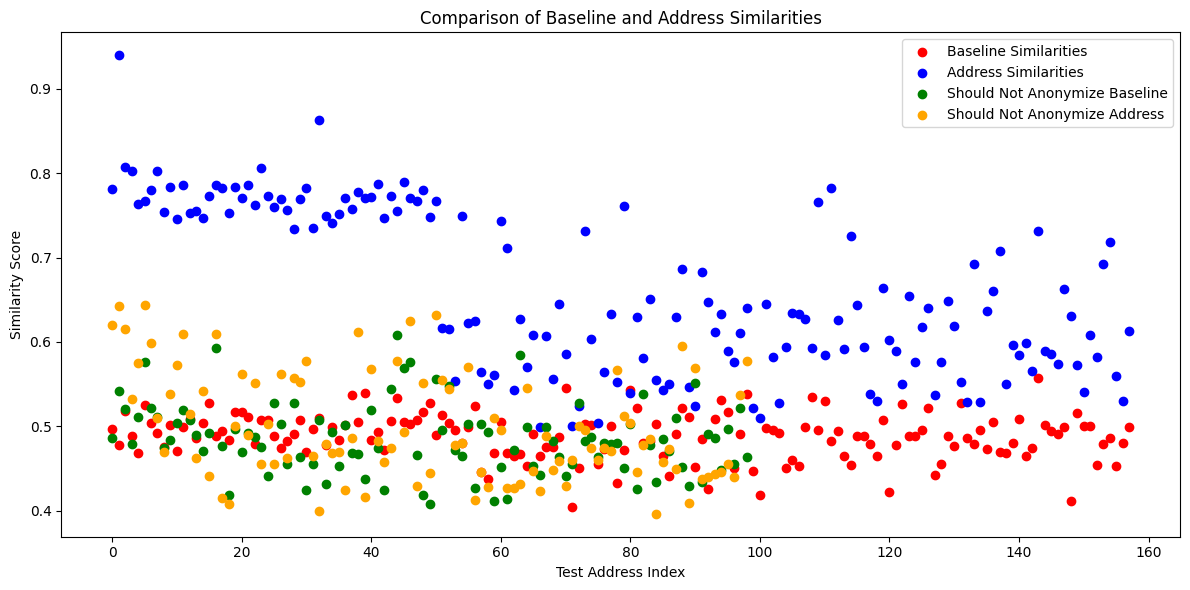

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(range(len(baseline_similarities)), baseline_similarities, color='red', label='Baseline Similarities')
plt.scatter(range(len(address_similarities)), address_similarities, color='blue', label='Address Similarities')
plt.scatter(range(len(addresses_should_not_be_anonymized_baseline_similarities)), 
            addresses_should_not_be_anonymized_baseline_similarities, 
            color='green', label='Should Not Anonymize Baseline')
plt.scatter(range(len(addresses_should_not_be_anonymized_addresses_similarities)), 
            addresses_should_not_be_anonymized_addresses_similarities, 
            color='orange', label='Should Not Anonymize Address')

plt.xlabel('Test Address Index')
plt.ylabel('Similarity Score')
plt.title('Comparison of Baseline and Address Similarities')
plt.legend()

plt.tight_layout()
plt.show()


In [83]:
french_male_names = [
"Jean", "Pierre", "Michel", "Philippe", "André", "Louis", "François", "Alain", "Jacques", "Bernard",
    "Marcel", "René", "Paul", "Robert", "Henri", "Claude", "Daniel", "Christian", "Georges", "Roger",
    "Joseph", "Maurice", "Charles", "Guy", "Raymond", "Gérard", "Yves", "Patrick", "Serge", "Lucien",
    "Émile", "Fernand", "Julien", "Gaston", "Albert", "Léon", "Étienne", "Gilbert", "Gilles", "Olivier",
    "Pascal", "Thierry", "Laurent", "Nicolas", "Stéphane", "Frédéric", "Éric", "Denis", "Christophe", "Vincent",
    "Antoine", "Benoît", "Cédric", "Damien", "Dominique", "Édouard", "Fabrice", "Grégoire", "Hugo", "Igor",
    "Jérôme", "Kévin", "Ludovic", "Maxime", "Nicolas", "Olivier", "Pierre", "Quentin", "Raphaël", "Sébastien",
    "Thibault", "Ulysse", "Victor", "William", "Xavier", "Yann", "Zacharie", "Adrien", "Baptiste", "Clément",
    "Dylan", "Éliott", "Florian", "Gaël", "Hervé", "Ilan", "Jules", "Kilian", "Léo", "Mathieu",
    "Nathan", "Oscar", "Paul", "Quentin", "Romain", "Simon", "Théo", "Ugo", "Valentin", "Willy",
    "Alexandre", "Bastien", "Cyril", "David", "Émeric", "Fabien", "Gabin", "Hippolyte", "Isidore", "Jean-Baptiste",
    "Kylian", "Lilian", "Malo", "Nolan", "Octave", "Philippe", "Rémi", "Sacha", "Timothée", "Urbain",
    "Vianney", "Wilfried", "Xander", "Yvan", "Zéphyr", "Arnaud", "Bruno", "César", "Dimitri", "Émeric",
    "Félix", "Gauthier", "Hadrien", "Ibrahim", "Johan", "Kenny", "Lorenzo", "Marius", "Noham", "Owen",
    "Pablo", "Quincy", "Rayan", "Samuel", "Tanguy", "Ugo", "Vasco", "Warren", "Xavi", "Yannis"
]
# Array of 50 female French names
french_female_names = [
    "Marie", "Jeanne", "Françoise", "Monique", "Catherine", "Nathalie", "Isabelle", "Sylvie", "Anne", "Martine",
    "Jacqueline", "Nicole", "Sophie", "Chantal", "Suzanne", "Christiane", "Yvonne", "Madeleine", "Céline", "Véronique",
    "Marguerite", "Christine", "Simone", "Thérèse", "Odette", "Denise", "Geneviève", "Hélène", "Brigitte", "Valérie",
    "Danielle", "Josette", "Paulette", "Renée", "Colette", "Claudine", "Micheline", "Marcelle", "Éliane", "Andrée",
    "Stéphanie", "Patricia", "Sandrine", "Dominique", "Laurence", "Caroline", "Élisabeth", "Aurélie", "Émilie", "Julie",
    "Camille", "Claire", "Lucie", "Mathilde", "Alice", "Juliette", "Léa", "Manon", "Pauline", "Anaïs",
    "Élodie", "Sarah", "Laura", "Marion", "Océane", "Charlotte", "Audrey", "Mélanie", "Justine", "Amélie",
    "Adeline", "Delphine", "Virginie", "Laetitia", "Eloïse", "Cécile", "Estelle", "Morgane", "Amandine", "Inès",
    "Clémence", "Alexia", "Léna", "Zoé", "Elsa", "Noémie", "Maëlle", "Romane", "Chloé", "Fanny",
    "Agathe", "Léonie", "Louise", "Jade", "Emma", "Margaux", "Solène", "Mélissa", "Coralie", "Marine"
]
# Array of 50 French family names
french_family_names = [
    "Martin", "Bernard", "Dubois", "Thomas", "Robert", "Richard", "Petit", "Durand", "Leroy", "Moreau",
    "Simon", "Laurent", "Lefebvre", "Michel", "Garcia", "David", "Bertrand", "Roux", "Vincent", "Fournier",
    "Morel", "Girard", "Andre", "Lefevre", "Mercier", "Dupont", "Lambert", "Bonnet", "Francois", "Martinez",
    "Legrand", "Garnier", "Faure", "Rousseau", "Blanc", "Guerin", "Muller", "Henry", "Roussel", "Nicolas",
    "Perrin", "Morin", "Mathieu", "Clement", "Gauthier", "Dumont", "Lopez", "Fontaine", "Chevalier", "Robin",
    "Leclerc", "Giraud", "Lacroix", "Lecomte", "Lemaire", "Moulin",
    "Marchand", "Renard", "Picard", "Gaillard", "Barbier", "Arnaud", "Meunier", "Caron", "Charpentier", "Dupuis",
    "Leroux", "Dufour", "Boucher", "Fleury", "Lemoine", "Pelletier", "Lejeune", "Renaud", "Deschamps", "Bourgeois",
    "Perez", "Brun", "Leclercq", "Guillot", "Collet", "Prevost", "Royer", "Colin", "Aubert", "Vidal",
    "Benoit", "Pichon", "Lefort", "Philippe", "Gérard", "Brunet", "Carpentier", "Rey", "Maillard", "Baron",
    "Berger", "Langlois", "Jacquet", "Lesage", "Cordier", "Aubry", "Humbert", "Bouvier", "Carre", "Olive"
    
]
# Array of 50 male German names
german_male_names = [
    "Hans", "Klaus", "Wolfgang", "Jürgen", "Dieter", "Manfred", "Helmut", "Günter", "Peter", "Uwe",
    "Horst", "Werner", "Gerhard", "Walter", "Heinrich", "Karl", "Michael", "Andreas", "Stefan",
    "Frank", "Rainer", "Bernd", "Rolf", "Martin", "Jörg", "Heinz", "Matthias", "Ulrich", "Joachim",
    "Ernst", "Hermann", "Otto", "Friedrich", "Erich", "Kurt", "Wilhelm", "Reinhard", "Volker", "Gerd",
    "Hartmut", "Detlef", "Norbert", "Axel", "Holger", "Bernhard", "Christoph", "Udo", "Markus", "Sven",
    "Thomas", "Johannes", "Lukas", "Felix", "Maximilian", "Alexander", "Daniel", "Tobias", "Sebastian", "Florian",
    "Philipp", "Jan", "David", "Simon", "Benjamin", "Tim", "Niklas", "Fabian", "Jonas", "Moritz",
    "Leon", "Elias", "Paul", "Luca", "Julian", "Max", "Finn", "Noah", "Emil", "Anton",
    "Oskar", "Leo", "Theo", "Luis", "Ben", "Mats", "Liam", "Nico", "Tom", "Erik",
    "Jannik", "Vincent", "Jonathan", "Lennard", "Hannes", "Marvin", "Linus", "Nils", "Robin", "Till"
]
# Array of 50 female German names
german_female_names = [
    "Anna", "Maria", "Ursula", "Elisabeth", "Monika", "Helga", "Ingrid", "Renate", "Gisela", "Christa",
    "Erika", "Karin", "Brigitte", "Hannelore", "Gerda", "Inge", "Ilse", "Hildegard", "Elfriede", "Irmgard",
    "Gertrud", "Marianne", "Edith", "Lieselotte", "Anneliese", "Sigrid", "Waltraud", "Elke", "Gerlinde", "Heike",
    "Sabine", "Birgit", "Angelika", "Gabriele", "Petra", "Susanne", "Bärbel", "Claudia", "Ingeborg", "Christel",
    "Margot", "Jutta", "Dagmar", "Ute", "Martina", "Andrea", "Stefanie", "Silvia", "Beate", "Cornelia",
    "Sophie", "Julia", "Laura", "Katharina", "Christina", "Melanie", "Nicole", "Katrin", "Nadine", "Simone",
    "Anja", "Tanja", "Manuela", "Anke", "Daniela", "Franziska", "Antje", "Stephanie", "Bettina", "Michaela",
    "Sonja", "Britta", "Kirsten", "Bianca", "Yvonne", "Carolin", "Katja", "Annika", "Svenja", "Jasmin",
    "Vanessa", "Janina", "Sabrina", "Miriam", "Verena", "Johanna", "Corinna", "Mareike", "Ramona", "Maren",
    "Lena", "Sarah", "Lisa", "Leonie", "Hannah", "Lara", "Nele", "Lea", "Emma", "Mia"
]
# Array of 50 German family names
german_family_names = [
    "Müller", "Schmidt", "Schneider", "Fischer", "Weber", "Meyer", "Wagner", "Becker", "Schulz", "Hoffmann",
    "Schäfer", "Koch", "Bauer", "Richter", "Klein", "Wolf", "Schröder", "Neumann", "Schwarz", "Zimmermann",
    "Braun", "Krüger", "Hofmann", "Hartmann", "Lange", "Schmitt", "Werner", "Schmitz", "Krause", "Meier",
    "Lehmann", "Schmid", "Schulze", "Maier", "Köhler", "Herrmann", "König", "Walter", "Mayer", "Huber",
    "Kaiser", "Fuchs", "Peters", "Lang", "Scholz", "Möller", "Weiß", "Jung", "Hahn", "Schubert",
    "Schumacher", "Vogel", "Friedrich", "Keller", "Günther", "Berger", "Frank", "Roth", "Beck", "Lorenz",
    "Baumann", "Franke", "Albrecht", "Ludwig", "Winter", "Kraus", "Martin", "Schuster", "Krauss", "Steiner",
    "Haas", "Jäger", "Otto", "Sommer", "Groß", "Seidel", "Heinrich", "Brandt", "Schreiber", "Graf",
    "Schulte", "Dietrich", "Ziegler", "Engel", "Kühn", "Kuhn", "Pohl", "Horn", "Busch", "Thomas",
    "Wolff", "Sauer", "Bergmann", "Pfeffer", "Vogt", "Ernst", "Seidl", "Hübner", "Beyer", "Hoppe"
]

names = set()

names.update(french_male_names)
names.update(french_female_names)
names.update(french_family_names)
names.update(german_male_names)
names.update(german_female_names)
names.update(german_family_names)

for n in names:
    print(n)

Guillot
Schmitz
Hoppe
Herrmann
Sarah
Frédéric
Jan
Elke
Mélissa
Stephanie
Seidl
Pierre
Gaillard
Heinrich
Michael
Theo
Sommer
Beyer
Marcel
Octave
Émilie
Chantal
Bourgeois
Lisa
Zimmermann
Keller
Jules
Léa
Schmitt
Hartmann
Susanne
Franke
Schubert
William
Hélène
Felix
Ludovic
Vogel
Émile
Melanie
Brandt
Nathalie
Lea
Leonie
Justine
Bruno
Max
Antoine
Julien
Amandine
Gabriele
Sebastian
Édouard
Andre
Hugo
Barbier
Gauthier
Gerda
Giraud
Renard
Georges
Hervé
Maria
Nils
Ilse
Ugo
Hildegard
Renée
Till
Tanja
Gertrud
Petit
Audrey
Caron
Hannah
Ibrahim
Lefebvre
Krauss
Alexander
Anaïs
Gerhard
Jérôme
Mathieu
Erika
Joseph
Erik
Meyer
Samuel
Pelletier
Thérèse
Mathilde
Hadrien
Pauline
Lange
Catherine
Bernard
Cyril
Morin
Claire
Otto
Vogt
Friedrich
Durand
Krüger
Angelika
Léna
Dieter
Ziegler
Timothée
Roux
Martinez
Edith
Leclercq
Lejeune
Franziska
Maximilian
Andreas
Tom
Margaux
Chloé
Malo
Brigitte
Vincent
Éliott
Aurélie
Engel
Bergmann
Rayan
Albert
Leo
Margot
Florian
Pohl
Groß
Brun
Lang
Gerd
Philipp
Michel
Corinna
D